<a href="https://colab.research.google.com/github/coder-rakeshpaul/EmotionAnalysis/blob/main/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
import nltk
import string
import re
import inflect

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Reading the data amd converting it into a dataframe

In [2]:
df1 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv')
df2 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv')
df3 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv')
frames = [df1, df2, df3]
data = pd.concat(frames)

Droping unnecessary columns

In [3]:
data=data.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id','example_very_unclear'], axis=1)
data.shape

(211225, 29)

Droping the duplicates

In [4]:
data.drop_duplicates(subset='text', inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(57732, 29)

Droping data with mixed emotions

In [5]:
sum = np.array(data.sum(axis=1))
ind = np.where(np.logical_or(sum>1, sum==0))[0].tolist()
data.drop(ind, inplace = True)
data.reset_index(drop=True, inplace=True)
data.shape

C:\Users\mayur\AppData\Local\Temp\ipykernel_15836\1218242578.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum = np.array(data.sum(axis=1))


(46741, 29)

Creating a list of emotions

In [6]:
emotions = list(data.columns)[1:]

In [7]:
emo = []
for text in range(0, data.shape[0]):
  for emotion in emotions:
    if data.loc[text][emotion] == 1:
      emo.append(emotion)


In [8]:
data.drop(data.iloc[:, 1:29], inplace=True, axis=1)

In [9]:
data

,text
0,That game hurt.
1,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.
3,"[NAME] was nowhere near them, he was by the Fa..."
4,Right? Considering it’s such an important docu...
...,...
46736,Oh [NAME] i forgot about those. I used to love...
46737,I didn’t even notice that one. I noticed the b...
46738,"Thanks, [NAME]"
46739,Everyone likes [NAME].


In [10]:
data['Emotions']= emo

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Emotion_id'] = le.fit_transform(data['Emotions'])

data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18
46737,I didn’t even notice that one. I noticed the b...,neutral,20
46738,"Thanks, [NAME]",gratitude,15
46739,Everyone likes [NAME].,love,18


c:\Users\mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emotion_id'>

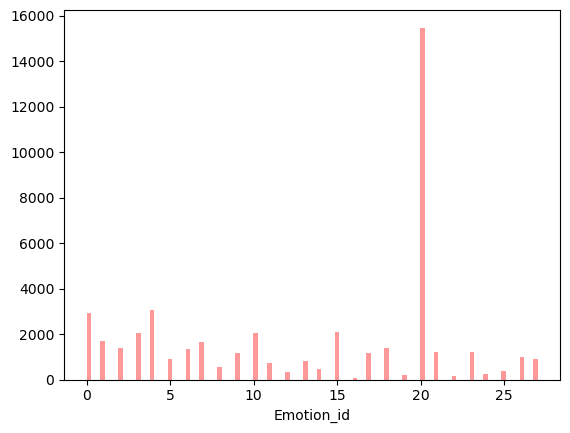

In [11]:
from seaborn import distplot

distplot(data['Emotion_id'], kde=False, color='red', bins=100)

Preprocessing the data

In [12]:
def text_lowercase(text):
	return text.lower()
 
import string
# remove punctuation
def remove_punctuation(text):
	return text.translate(str.maketrans('', '', string.punctuation))

Removing stop words

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
# remove stopwords function
def remove_stopwords_tokenize_and_stem(text):
	stop_words = set(stopwords.words("english"))
	word_tokens = word_tokenize(text)
	filtered_text = [word for word in word_tokens if word not in stop_words]
	stems = [stemmer.stem(word) for word in filtered_text]
	return stems

Stemming the data

In [14]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
	word_tokens = word_tokenize(text)
	stems = [stemmer.stem(word) for word in word_tokens]
	return stems

In [15]:
def text_preprocess(text):
  t = remove_punctuation(text)
  t = text_lowercase(t)
  t = remove_stopwords_tokenize_and_stem(t)
  return t

In [16]:
data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18
46737,I didn’t even notice that one. I noticed the b...,neutral,20
46738,"Thanks, [NAME]",gratitude,15
46739,Everyone likes [NAME].,love,18


In [17]:
data['tokenized'] = data.apply(lambda x: text_preprocess(x['text']), axis=1)

In [18]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]"
46737,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]"
46738,"Thanks, [NAME]",gratitude,15,"[thank, name]"
46739,Everyone likes [NAME].,love,18,"[everyon, like, name]"


**Removing rows in which the token list is empty (this occurs due to stemming)**

In [19]:
emp_token_ind = []

tokens = data['tokenized'].to_numpy()
for i in range(0, tokens.size):
    if len(tokens[i]) == 0:
        emp_token_ind.append(i)

data.drop(emp_token_ind ,axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [20]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
46637,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]"
46638,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]"
46639,"Thanks, [NAME]",gratitude,15,"[thank, name]"
46640,Everyone likes [NAME].,love,18,"[everyon, like, name]"


In [21]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

model = Word2Vec(window=5, min_count=1, workers=4, sg=0)

model.build_vocab(data['tokenized'], progress_per=1000)
model.train(data['tokenized'], total_examples=model.corpus_count, epochs=model.epochs)

model.save("main/saved models/word2vec.model")

In [22]:
model.wv.most_similar('best')
(model.wv['game'] + model.wv['hurt'])/2

array([-0.23980856,  0.30924225,  0.2889131 ,  0.27841353,  0.3120302 ,
       -1.1156938 ,  0.24360795,  1.2357252 , -0.7871121 , -0.48293853,
       -0.4505977 , -0.64914453, -0.27973816,  0.34864426,  0.19921398,
       -0.35633475, -0.18354331, -0.5252199 , -0.11819288, -1.1423811 ,
        0.41151652,  0.20171675,  0.45378867, -0.67890555, -0.11271609,
       -0.01719079, -0.0545233 , -0.35759374, -0.68812233, -0.08823372,
        0.63630915,  0.1962613 ,  0.31098112, -0.44491315,  0.01204824,
        0.8778883 , -0.1676623 , -0.49328408, -0.40282503, -0.9492064 ,
        0.13055769, -0.44314456, -0.36894482,  0.10052611,  0.5169957 ,
       -0.26725736, -0.25589663, -0.17469689,  0.43854767,  0.63061297,
        0.42014533, -0.24622987, -0.3905475 , -0.03696007, -0.44735414,
        0.35929543,  0.36409736, -0.06564989, -0.6754742 ,  0.19230565,
        0.02181657,  0.27555805, -0.29333887, -0.12151019, -0.40474364,
        0.46382228,  0.11440402,  0.45515475, -0.84795934,  0.76

Vectorize the tokenized lists

In [23]:
inputs = []

for token in data['tokenized']:
    inputs.append(model.wv[token])

data['Inputs'] = inputs


In [24]:
print(data['Inputs'][0])

[[-0.30854788  0.18204293  0.42950445  0.40951198  0.5040612  -1.4174716
   0.41877958  1.3174709  -1.0796828  -0.5731556  -0.69097877 -0.5859114
  -0.3620589   0.44649988  0.19187732 -0.4867575  -0.36877388 -0.6195544
  -0.29738072 -1.3484913   0.55311286  0.19334503  0.5236567  -0.8955858
  -0.13933738 -0.07963673  0.05269325 -0.42249078 -0.86004305 -0.17262736
   0.70798403  0.36533633  0.3584942  -0.39561075  0.05043959  1.154002
  -0.27690172 -0.49795252 -0.42562747 -1.1666787   0.12381005 -0.5259444
  -0.4270327   0.13556507  0.5899694  -0.27669147 -0.17301212 -0.34617507
   0.61851317  0.8314889   0.6015434  -0.15361926 -0.50645745  0.05425134
  -0.56744903  0.51442355  0.41671348 -0.11925797 -0.8685281   0.09399975
   0.08798321  0.32652888 -0.46920425 -0.31193352 -0.4409031   0.4181189
   0.11320119  0.41348752 -0.98391014  0.84051305 -0.07214007  0.12302396
   0.14879386  0.13301489  1.0037469  -0.09481306  0.6014643  -0.22296788
  -0.40806854  0.52641225  0.21651094  0.17882

Perform **Average Word2Vec** on the input column

In [25]:
inputs = []
for input in data['Inputs']:
    sum = 0
    for i in input:
        sum = sum + i
    avg = sum/len(input)
    inputs.append(avg)

data['Inputs'] = inputs


In [26]:
data

,text,Emotions,Emotion_id,tokenized,Inputs
0,That game hurt.,sadness,26,"[game, hurt]","[-0.23980856, 0.30924225, 0.2889131, 0.2784135..."
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]","[-0.054478846, 0.68874216, 0.15365359, 0.19634..."
2,Man I love reddit.,love,18,"[man, love, reddit]","[-0.20328994, 0.46478167, 0.19019409, 0.211051..."
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]","[-0.051740456, 0.20157528, 0.14858916, 0.12249..."
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam...","[-0.13357426, 0.5235879, 0.09464794, 0.1486020..."
...,...,...,...,...,...
46637,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]","[-0.14708427, 0.50020075, 0.20055194, 0.193860..."
46638,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]","[-0.15118442, 0.5772268, 0.19307154, 0.2373702..."
46639,"Thanks, [NAME]",gratitude,15,"[thank, name]","[-0.17597935, 0.39596874, 0.16908649, 0.200962..."
46640,Everyone likes [NAME].,love,18,"[everyon, like, name]","[-0.11597981, 0.6524165, 0.164362, 0.22651522,..."


In [29]:
data.to_csv('main/saved data/tokenized_inputs.csv')